## LIME (Local Interpretable Model-agnostic Explanations)

In [76]:
!pip install lime

### Importing all the necessary Libraries

In [77]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [78]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving winequality-red.csv to winequality-red (5).csv


In [79]:
wine_df = pd.read_csv(filename)

In [80]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [81]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [82]:
wine_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Input and Output

In [84]:
X = wine_df.drop('quality', axis=1)
y = pd.get_dummies(wine_df['quality'])

### Splitting the data

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define and train the model

In [86]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,046 (11.90 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [87]:
compile = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [101]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9496 - loss: 0.2025 - val_accuracy: 0.6719 - val_loss: 1.3511
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9346 - loss: 0.2188 - val_accuracy: 0.6758 - val_loss: 1.3400
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9519 - loss: 0.1918 - val_accuracy: 0.6602 - val_loss: 1.3599
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9348 - loss: 0.2001 - val_accuracy: 0.6641 - val_loss: 1.3767
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9546 - loss: 0.1831 - val_accuracy: 0.6602 - val_loss: 1.3402
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.1869 - val_accuracy: 0.6680 - val_loss: 1.3672
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.1839 - val_accuracy: 0.6562 - val_loss: 1.4160
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9444 - loss: 0.2009 - val_accuracy: 0.6641 - val_loss:

### Create LIME Explainer

In [89]:
explainer = LimeTabularExplainer(X_train, feature_names=X.columns, class_names=y.columns, mode='classification')

### Explain the single instance

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


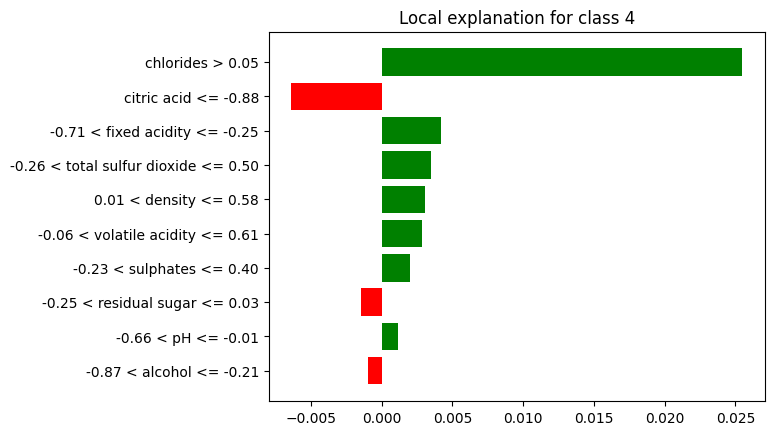

In [90]:
i = 0
exp = explainer.explain_instance(X_test[i], model.predict, num_features=10)
fig = exp.as_pyplot_figure()
plt.show(fig)


### Summarize feature importance across multiple instance

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[('chlorides > 0.05', 0.02910098981798593), ('citric acid <= -0.88', -0.0057053475950793785), ('-0.06 < volatile acidity <= 0.61', 0.00525443253073984), ('-0.23 < sulphates <= 0.40', 0.004132690940794372), ('-0.71 < fixed acidity <= -0.25', 0.003179116781501259), ('-0.26 < total sulfur dioxide <= 0.50', 0.0030937231733132752), ('-0.66 < pH <= -0.01', 0.0030147043147167873), ('-0.25 < residual sugar <= 0.03', -0.001301079018025435), ('-0.86 < free sulfur dioxide <= -0.18', 0.0011033588783414307), ('0.01 < density <= 0.58', -0.0006355162682352792)]


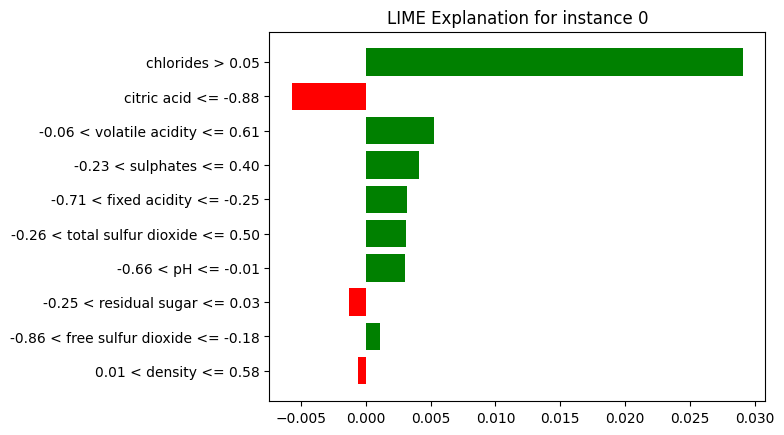

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[('total sulfur dioxide > 0.50', -0.018172237615350022), ('alcohol <= -0.87', -0.010706078853085065), ('-0.73 < volatile acidity <= -0.06', -0.0075851776666871), ('-0.46 < residual sugar <= -0.25', -0.006971183635337352), ('-0.06 < citric acid <= 0.81', 0.005434346141053658), ('-0.17 < chlorides <= 0.05', -0.005243854080645561), ('-0.71 < fixed acidity <= -0.25', 0.004297883958332028), ('sulphates <= -0.63', 0.0027494140706699525), ('free sulfur dioxide > 0.50', 0.0025581245118065036), ('0.01 < density <= 0.58', 0.0019139399393536957)]


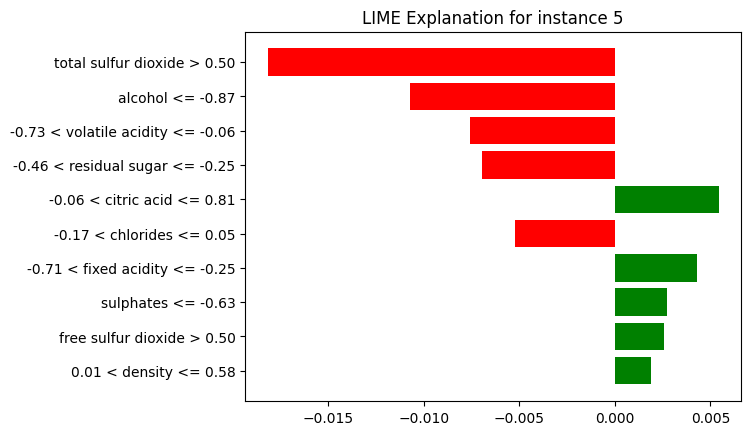

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[('chlorides > 0.05', 0.02671058331648488), ('-0.73 < volatile acidity <= -0.06', -0.007835613026587496), ('free sulfur dioxide <= -0.86', -0.007760954660885509), ('fixed acidity > 0.51', -0.007438517936781419), ('total sulfur dioxide <= -0.75', 0.005944202483808119), ('pH <= -0.66', -0.005792582088493727), ('-0.23 < sulphates <= 0.40', 0.0056556375853585), ('alcohol > 0.65', 0.002766677424862147), ('0.01 < density <= 0.58', 0.0011671867228180573), ('-0.25 < residual sugar <= 0.03', 0.0010364442489446647)]


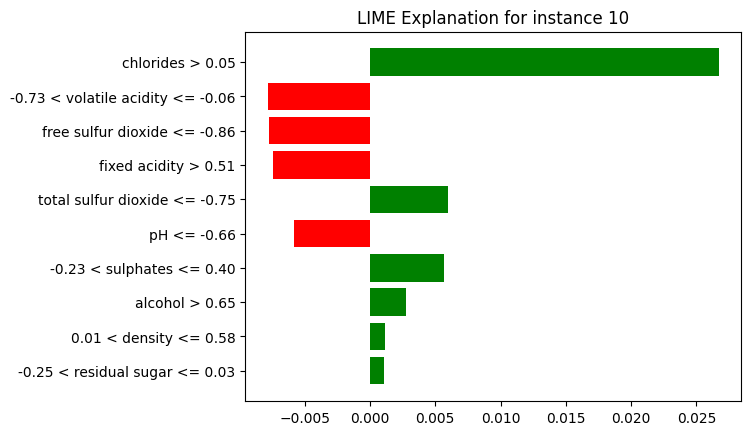

In [99]:
import matplotlib.pyplot as plt

from collections import Counter

instance_to_explain = [0, 5, 10]
explanations = []
feature_weights = Counter()

for i in instance_to_explain:
    # Get LIME explanation for instance i
    exp = explainer.explain_instance(X_test[i], model.predict, num_features=10)

    explanations.append(exp)
    print(exp.as_list())

    # Plot bar chart for this instance
    fig = exp.as_pyplot_figure()
    plt.title(f'LIME Explanation for instance {i}')
    plt.show()